In [2]:
import os
import shutil
import cv2

In [4]:
shutil.copy2('drive/My Drive/Dataset/Dataset.zip','.')

'./Dataset.zip'

In [5]:
from zipfile import ZipFile
fname='Dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
file=os.listdir('normal')
cnt=0
for f in file:
  cnt+=1
print(cnt)

1000


In [13]:
os.mkdir('covid2')
os.mkdir('normal2')
files=os.listdir('normal')
for f in files:
  image = cv2.imread(os.path.join('normal',f))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(os.path.join('normal2',f),gray)

files1=os.listdir('covid')
for f in files1:
  image = cv2.imread(os.path.join('covid',f))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(os.path.join('covid2',f),gray)

In [12]:
# shutil.rmtree('covid2')
# shutil.rmtree('normal2')

In [14]:
os.mkdir('Dataset')
shutil.move('covid2','Dataset')
shutil.move('normal2','Dataset')

'Dataset/normal2'

In [15]:
os.chdir('Dataset')
os.rename('covid2','0')
os.rename('normal2','1')

os.chdir('../')

In [16]:
import random
os.chdir('Dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('test')
  os.mkdir('valid')

  for i in range(0,2):
    shutil.move(f'{i}','train')
    os.mkdir(f'test/{i}')
    os.mkdir(f'valid/{i}')

    f=100
    if(i==0):
      f=50

    test_samples=random.sample(os.listdir(f'train/{i}'),f)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}',f'test/{i}')

    valid_samples=random.sample(os.listdir(f'train/{i}'),f)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}') 

os.chdir("../")  

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [18]:
train_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.1,
    shear_range=.1,
    horizontal_flip=True
                                       )

test_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                       )
valid_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                       )

In [19]:
train_path='Dataset/train'
test_path='Dataset/test'
valid_path='Dataset/valid'

In [20]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb'
)

Found 1127 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [21]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [42]:
model=Sequential()
for layer in vgg16_model.layers[:-2]:
  model.add(layer)

In [56]:
for layer in model.layers:
  # layer.trainable=False
  print(layer)

In [44]:
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [45]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(train_gen,validation_data=valid_gen,epochs=20,batch_size=128,shuffle=True,verbose=2)

Epoch 1/20
36/36 - 35s - loss: 0.3412 - accuracy: 0.9530 - val_loss: 0.1805 - val_accuracy: 0.9867
Epoch 2/20
36/36 - 34s - loss: 0.1194 - accuracy: 0.9831 - val_loss: 0.1551 - val_accuracy: 0.9867
Epoch 3/20
36/36 - 33s - loss: 0.0354 - accuracy: 0.9938 - val_loss: 0.1159 - val_accuracy: 0.9933
Epoch 4/20
36/36 - 33s - loss: 0.0249 - accuracy: 0.9947 - val_loss: 0.2198 - val_accuracy: 0.9800
Epoch 5/20
36/36 - 33s - loss: 0.0426 - accuracy: 0.9894 - val_loss: 0.2088 - val_accuracy: 0.9867
Epoch 6/20
36/36 - 33s - loss: 0.0175 - accuracy: 0.9973 - val_loss: 0.0946 - val_accuracy: 0.9933
Epoch 7/20
36/36 - 33s - loss: 0.0246 - accuracy: 0.9965 - val_loss: 0.1192 - val_accuracy: 0.9933
Epoch 8/20
36/36 - 33s - loss: 0.0282 - accuracy: 0.9938 - val_loss: 0.2500 - val_accuracy: 0.9867
Epoch 9/20
36/36 - 33s - loss: 0.0921 - accuracy: 0.9858 - val_loss: 0.4493 - val_accuracy: 0.9600
Epoch 10/20
36/36 - 33s - loss: 0.1174 - accuracy: 0.9814 - val_loss: 0.2104 - val_accuracy: 0.9867
Epoch 11/

In [47]:
predictions=model.predict(test_gen)

In [48]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [49]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[17 33]
 [29 71]]


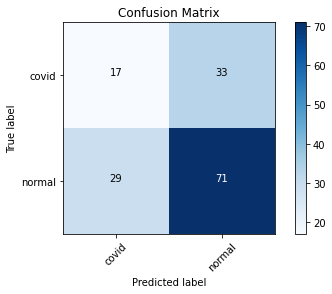

In [50]:
cm_plot_labels=['covid','normal']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')